In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

# Importing Data

In [ ]:
import kagglehub
puneet6060_intel_image_classification_path = kagglehub.dataset_download('puneet6060/intel-image-classification')

print('Data source import complete.')

Using Colab cache for faster access to the 'intel-image-classification' dataset.
Data source import complete.


# Creating Training Dataframe

In [ ]:

train_dir = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_dir = "/kaggle/input/intel-image-classification/seg_test/seg_test"


In [ ]:
train_0dir = os.path.join(train_dir, "buildings")
train_1dir = os.path.join(train_dir, "forest")
train_2dir = os.path.join(train_dir, "glacier")
train_3dir = os.path.join(train_dir, "mountain")
train_4dir = os.path.join(train_dir, "sea")
train_5dir = os.path.join(train_dir, "street")

In [ ]:
train_buindings = pd.DataFrame({"Image_path" : os.listdir(train_0dir)})
train_buindings['Image_path'] = train_buindings['Image_path'].apply(lambda x: os.path.join(train_0dir, x))
train_buindings['label'] = 'Buildings'
train_buindings['label'] = train_buindings['label']
train_buindings.shape

(2191, 2)

In [ ]:
train_forest = pd.DataFrame({"Image_path" : os.listdir(train_1dir)})
train_forest['Image_path'] = train_forest['Image_path'].apply(lambda x: os.path.join(train_1dir, x))
train_forest['label'] = 'Forest'
train_forest['label'] =train_forest['label']
train_forest.shape

(2271, 2)

In [ ]:
train_glacier = pd.DataFrame({"Image_path" : os.listdir(train_2dir)})
train_glacier['Image_path'] = train_glacier['Image_path'].apply(lambda x: os.path.join(train_2dir, x))
train_glacier['label'] = 'Glacier'
train_glacier['label'] = train_glacier['label']
train_glacier.shape

(2404, 2)

In [ ]:
train_mountain = pd.DataFrame({"Image_path" : os.listdir(train_3dir)})
train_mountain['Image_path'] = train_mountain['Image_path'].apply(lambda x: os.path.join(train_3dir, x))
train_mountain['label'] = 'Mountain'
train_mountain['label'] = train_mountain['label']
train_mountain.shape

(2512, 2)

In [ ]:

train_sea = pd.DataFrame({"Image_path" : os.listdir(train_4dir)})
train_sea['Image_path'] = train_sea['Image_path'].apply(lambda x: os.path.join(train_4dir, x))
train_sea['label'] = "Sea"
train_sea['label'] = train_sea['label']
train_sea.shape

(2274, 2)

In [ ]:
train_street = pd.DataFrame({"Image_path" : os.listdir(train_5dir)})
train_street['Image_path'] = train_street['Image_path'].apply(lambda x: os.path.join(train_5dir, x))
train_street['label'] = 'Street'
train_street['label'] = train_street['label']
train_street.shape

(2382, 2)

In [ ]:
train_buindings.head()

,Image_path,label
0,/kaggle/input/intel-image-classification/seg_t...,Buildings
1,/kaggle/input/intel-image-classification/seg_t...,Buildings
2,/kaggle/input/intel-image-classification/seg_t...,Buildings
3,/kaggle/input/intel-image-classification/seg_t...,Buildings
4,/kaggle/input/intel-image-classification/seg_t...,Buildings


In [ ]:
train_forest.head()

,Image_path,label
0,/kaggle/input/intel-image-classification/seg_t...,Forest
1,/kaggle/input/intel-image-classification/seg_t...,Forest
2,/kaggle/input/intel-image-classification/seg_t...,Forest
3,/kaggle/input/intel-image-classification/seg_t...,Forest
4,/kaggle/input/intel-image-classification/seg_t...,Forest


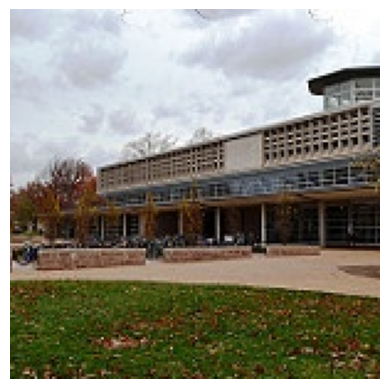

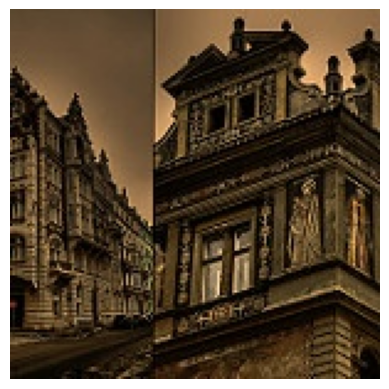

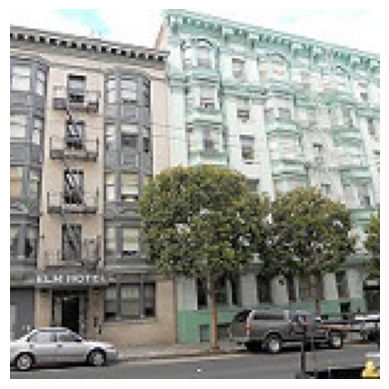

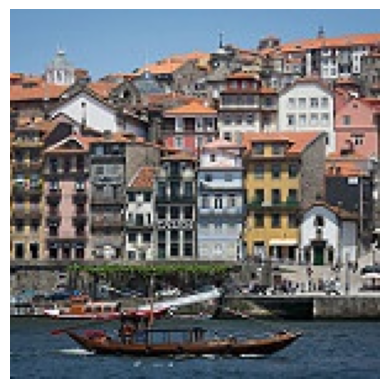

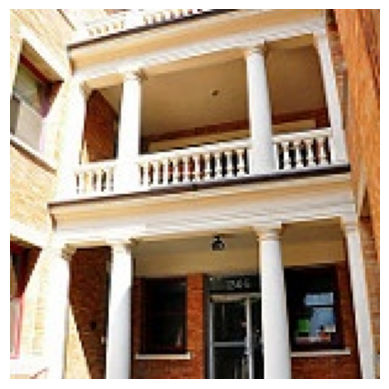

In [ ]:

for i in range(5):
    img_path = train_buindings.iloc[i]['Image_path']
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

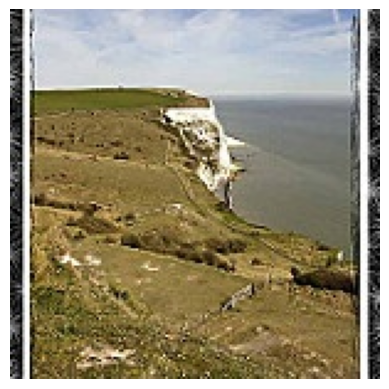

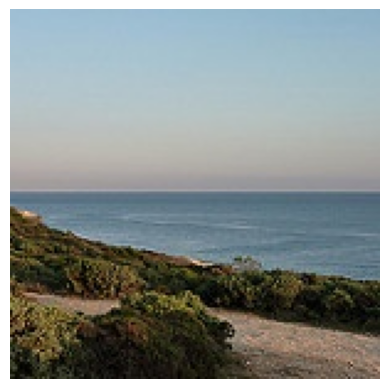

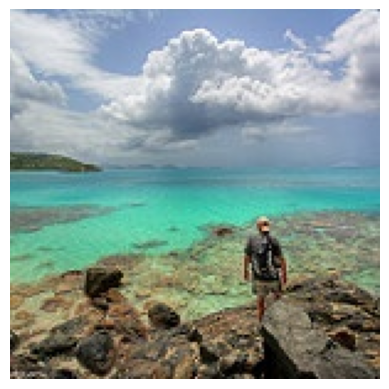

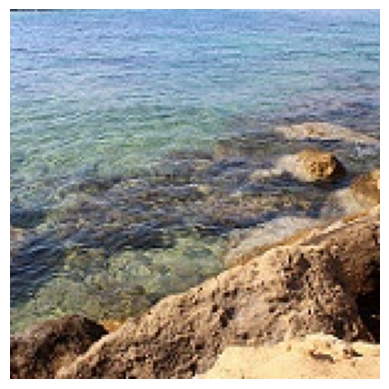

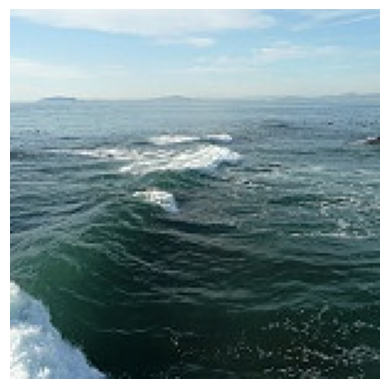

In [ ]:
for i in range(5):
    img_path = train_sea.iloc[i]['Image_path']
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:

scenes = [train_buindings, train_forest, train_glacier, train_mountain, train_sea, train_street]
train_df = pd.concat(scenes, axis=0)
train_df.shape

(14034, 2)

In [ ]:
train_df['label'].value_counts()

,count
label,
Mountain,2512
Glacier,2404
Street,2382
Sea,2274
Forest,2271
Buildings,2191


# Validation DF

In [ ]:
test_0dir = os.path.join(test_dir, "buildings")
test_1dir = os.path.join(test_dir, "forest")
test_2dir = os.path.join(test_dir, "glacier")
test_3dir = os.path.join(test_dir, "mountain")
test_4dir = os.path.join(test_dir, "sea")
test_5dir = os.path.join(test_dir, "street")

In [ ]:
val_buildings = pd.DataFrame({"Image_path": os.listdir(test_0dir)})
val_buildings['Image_path'] = val_buildings['Image_path'].apply(lambda x: os.path.join(test_0dir, x))
val_buildings['label'] = 'Buildings'
val_buildings['label'] = val_buildings['label']

val_forest = pd.DataFrame({"Image_path": os.listdir(test_1dir)})
val_forest['Image_path'] = val_forest['Image_path'].apply(lambda x: os.path.join(test_1dir, x))
val_forest['label'] = 'Forest'
val_forest['label'] = val_forest['label']

val_glacier = pd.DataFrame({"Image_path": os.listdir(test_2dir)})
val_glacier['Image_path'] = val_glacier['Image_path'].apply(lambda x: os.path.join(test_2dir, x))
val_glacier['label'] = 'Glacier'
val_glacier['label'] = val_glacier['label']

val_mountain = pd.DataFrame({"Image_path": os.listdir(test_3dir)})
val_mountain['Image_path'] = val_mountain['Image_path'].apply(lambda x: os.path.join(test_3dir, x))
val_mountain['label'] = 'Mountain'
val_mountain['label'] = val_mountain['label']

val_sea = pd.DataFrame({"Image_path": os.listdir(test_4dir)})
val_sea['Image_path'] = val_sea['Image_path'].apply(lambda x: os.path.join(test_4dir, x))
val_sea['label'] = 'Sea'
val_sea['label'] = val_sea['label']

val_street = pd.DataFrame({"Image_path": os.listdir(test_5dir)})
val_street['Image_path'] = val_street['Image_path'].apply(lambda x: os.path.join(test_5dir, x))
val_street['label'] = 'Street'
val_street['label'] = val_street['label']

In [ ]:
validation_scenes = [val_buildings, val_forest, val_glacier, val_mountain, val_sea, val_street]
val_df = pd.concat(validation_scenes, axis=0)

In [ ]:

val_df.head()

,Image_path,label
0,/kaggle/input/intel-image-classification/seg_t...,Buildings
1,/kaggle/input/intel-image-classification/seg_t...,Buildings
2,/kaggle/input/intel-image-classification/seg_t...,Buildings
3,/kaggle/input/intel-image-classification/seg_t...,Buildings
4,/kaggle/input/intel-image-classification/seg_t...,Buildings


In [ ]:
display(val_df.shape)
display(val_df['label'].value_counts())

(3000, 2)

,count
label,
Glacier,553
Mountain,525
Sea,510
Street,501
Forest,474
Buildings,437


In [ ]:
train_df['label'].value_counts()

,count
label,
Mountain,2512
Glacier,2404
Street,2382
Sea,2274
Forest,2271
Buildings,2191


# Image Pre-processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'reflect'
)
val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
MAX_LEN = 150
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Image_path',
    y_col = 'label',
    target_size = (MAX_LEN, MAX_LEN),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = True
)
val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    x_col = 'Image_path',
    y_col = 'label',
    target_size = (MAX_LEN, MAX_LEN),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = True
)

Found 14034 validated image filenames belonging to 6 classes.
Found 3000 validated image filenames belonging to 6 classes.


# Building CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
NUM_SCENES = 6

model = Sequential([

    Input(shape = (MAX_LEN, MAX_LEN, 3),),

    Conv2D(32, (3, 3), activation = 'relu'),

    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(256, activation = 'relu'),
    Dropout(0.2),

    Dense(NUM_SCENES, activation = 'softmax')


])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

# Training Model

In [ ]:
EPOCHS = 32

history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = EPOCHS,
    verbose = 1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/32
439/439 ━━━━━━━━━━━━━━━━━━━━ 165s 349ms/step - accuracy: 0.4189 - loss: 1.9953 - val_accuracy: 0.6147 - val_loss: 1.0164
Epoch 2/32
439/439 ━━━━━━━━━━━━━━━━━━━━ 106s 240ms/step - accuracy: 0.5779 - loss: 1.0942 - val_accuracy: 0.6117 - val_loss: 0.9911
Epoch 3/32
439/439 ━━━━━━━━━━━━━━━━━━━━ 106s 242ms/step - accuracy: 0.6135 - loss: 0.9924 - val_accuracy: 0.6390 - val_loss: 0.9025
Epoch 4/32
439/439 ━━━━━━━━━━━━━━━━━━━━ 105s 238ms/step - accuracy: 0.6403 - loss: 0.9266 - val_accuracy: 0.7363 - val_loss: 0.7210
Epoch 5/32
439/439 ━━━━━━━━━━━━━━━━━━━━ 114s 258ms/step - accuracy: 0.6678 - loss: 0.8859 - val_accuracy: 0.7393 - val_loss: 0.7214
Epoch 6/32
439/439 ━━━━━━━━━━━━━━━━━━━━ 107s 243ms/step - accuracy: 0.7072 - loss: 0.8039 - val_accuracy: 0.7950 - val_loss: 0.5940
Epoch 7/32
439/439 ━━━━━━━━━━━━━━━━━━━━ 107s 244ms/step - accuracy: 0.7338 - loss: 0.7413 - val_accuracy: 0.8067 - val_loss: 0.5796
Epoch 8/32
439/439 ━━━━━━━━━━━━━━━━━━━━ 105s 239ms/step - accuracy: 0.7450 -

In [ ]:
model.save("GeoClaas_v01.keras")

In [ ]:
model.save("GeoClaas_v1.h5")

# Predicting

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
pred_path = '/kaggle/input/intel-image-classification/seg_pred/seg_pred'

In [ ]:
pred_df = pd.DataFrame({"Image_path": os.listdir(pred_path)})
pred_df['Image_path'] = pred_df['Image_path'].apply(lambda x: os.path.join(pred_path, x))
pred_df.head()

,Image_path
0,/kaggle/input/intel-image-classification/seg_p...
1,/kaggle/input/intel-image-classification/seg_p...
2,/kaggle/input/intel-image-classification/seg_p...
3,/kaggle/input/intel-image-classification/seg_p...
4,/kaggle/input/intel-image-classification/seg_p...


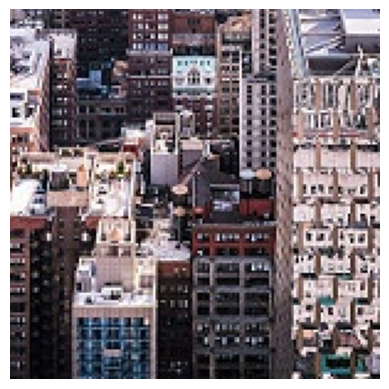

In [ ]:
# Get a random image path from pred_df
random_image_path = pred_df.sample(1)['Image_path'].iloc[0]

# Read and display the image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img = load_img(random_image_path, target_size = (MAX_LEN, MAX_LEN))
img = img_to_array(img)
img = img.reshape(1, MAX_LEN, MAX_LEN, 3)
img = img.astype('float32')
img = img / 255.0

In [ ]:
pred = model.predict(img)
class_index = np.argmax(pred, axis=1)
display("Predicted class:", class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'Predicted class:'

array([0])

In [ ]:
class_indices = {'building': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
idx_to_class = {v: k for k, v in class_indices.items()}

In [ ]:
pred_class = np.argmax(pred, axis=1)[0]  # get index as integer
pred_label = idx_to_class[pred_class]
print("Predicted label:", pred_label)

Predicted label: building


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,502,292 (196.47 MB)

 Trainable params: 17,167,430 (65.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,334,862 (130.98 MB)

In [ ]:
model.evaluate(val_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8725 - loss: 0.4238


[0.41654670238494873, 0.8706666827201843]